In [9]:
import pandas as pd
import numpy as np


In [11]:

data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [17]:
data.shape

(10000, 14)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [25]:
data= data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [27]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [31]:
data = pd.get_dummies(data,drop_first=True)

In [33]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [35]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [37]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [39]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

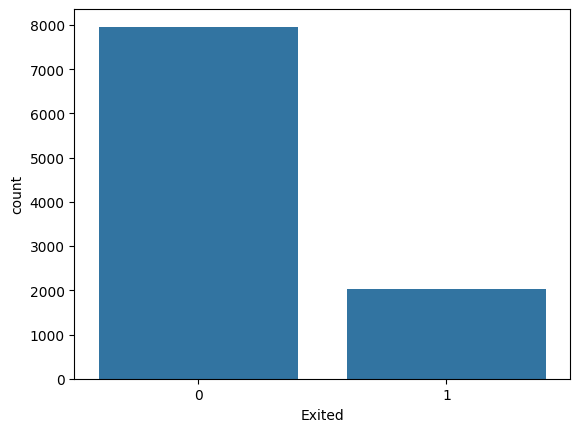

In [41]:
sns.countplot(x='Exited', data=data)

In [43]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [49]:
X_res.value_counts()
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler


In [60]:
Sc = StandardScaler()

In [62]:
X_train = Sc.fit_transform(X_train)

In [64]:
X_test = Sc.transform(X_test)

In [66]:
X_train

array([[ 1.27755285,  1.49258872, -0.28834291, ..., -0.76328808,
        -0.63123944,  0.81010262],
       [ 1.09222218,  0.09362014, -1.3887389 , ..., -0.76328808,
        -0.63123944,  0.81010262],
       [-0.45583405,  1.3926624 ,  0.81205309, ..., -0.76328808,
        -0.63123944, -1.23441152],
       ...,
       [ 0.19827422,  0.19354647,  1.17885175, ..., -0.76328808,
        -0.63123944,  0.81010262],
       [ 0.24188143,  0.19354647,  0.07845576, ..., -0.76328808,
        -0.63123944, -1.23441152],
       [ 0.52532835,  0.99295709, -1.3887389 , ...,  1.31012133,
        -0.63123944,  0.81010262]])

In [68]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()

In [72]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

0.7765222849968613

In [80]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [82]:
precision_score(y_test,y_pred)

np.float64(0.7686900958466454)

In [84]:
recall_score(y_test,y_pred)

np.float64(0.7746297488731487)

In [86]:
f1_score(y_test,y_pred)

np.float64(0.7716484926234766)

In [88]:
from sklearn import svm

In [90]:
model2 = svm.SVC()

In [92]:
model2.fit(X_train,y_train)

SVC()

In [94]:
y_pred2= model2.predict(X_test)
     

In [96]:
accuracy_score(y_test,y_pred2)

0.8462021343377275

In [98]:
recall_score(y_test,y_pred2)
     

np.float64(0.8274307791371539)

In [100]:
f1_score(y_test,y_pred2)

np.float64(0.8398692810457516)

# K neighbors Classifiers

In [105]:
from sklearn.neighbors  import KNeighborsClassifier

In [107]:
model3 = KNeighborsClassifier()

In [109]:
model3.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred3 = model3.predict(X_test)

In [113]:
accuracy_score(y_test,y_pred3)

0.8242310106716887

In [115]:
precision_score(y_test,y_pred3)

np.float64(0.8089607965152458)

In [117]:
recall_score(y_test,y_pred3)

np.float64(0.8370895041854475)

In [119]:
f1_score(y_test,y_pred3)

np.float64(0.8227848101265823)

# Random Forest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model4 = RandomForestClassifier()

In [126]:
model4.fit(X_train,y_train)

RandomForestClassifier()

In [128]:
y_pred4= model4.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred4)

0.8716258631512869

In [132]:
precision_score(y_test,y_pred4)

np.float64(0.8788079470198675)

In [134]:
recall_score(y_test,y_pred4)

np.float64(0.8544752092723761)

In [136]:
f1_score(y_test,y_pred4)

np.float64(0.8664707802807705)

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
model5 = GradientBoostingClassifier()

In [142]:
model5.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
y_pred5 = model5.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred5)

0.8421217827997489

In [148]:
precision_score(y_test,y_pred5)

np.float64(0.8463060686015831)

In [150]:
recall_score(y_test,y_pred5)

np.float64(0.8261429491307147)

In [152]:
f1_score(y_test,y_pred5)

np.float64(0.8361029651352232)

In [154]:
final_data = pd.DataFrame({
    'Model':['LogisticRegression','Support Vector Classifier','K neigherest','Random Forest','Gradient Boosting'],
    'Acc' : [accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5)]
})

In [156]:
final_data

,Model,Acc
0,LogisticRegression,0.776522
1,Support Vector Classifier,0.846202
2,K neigherest,0.824231
3,Random Forest,0.871626
4,Gradient Boosting,0.842122
